<a href="https://colab.research.google.com/github/MBrandao07/EDA-Most_Streamed_Sounds_Spotify/blob/main/EDA_Spotify_Most_Streamed_Sounds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Exploratória de dados - Músicas mais tocadas do Spotify**

## **Introdução e Objetivos**

### **Entendimento dos dados**
<br>

**Informações Básicas da Faixa:**

track_name: Nome da música.

artist(s)_name: Nome do(s) artista(s) que interpretam a música.

artist_count: Número de artistas que contribuíram para a música.

released_year, released_month, released_day: Detalhes da data de lançamento.
<br><br>

**Métricas de Streaming:**

in_spotify_playlists: Número de playlists do Spotify em que a música está presente.

in_spotify_charts: Posição da música nos rankings do Spotify.

streams: Número total de reproduções no Spotify.

in_apple_playlists, in_apple_charts: Presença da música em playlists e rankings da Apple Music.

in_deezer_playlists, in_deezer_charts: Presença da música em playlists e rankings do Deezer.

in_shazam_charts: Posição da música nos rankings do Shazam.
<br><br>

**Atributos Musicais:**

bpm: Batidas por minuto, representando o tempo/ritmo da música.

key: Tom da música.

mode: Indica se a música está em modo maior ou menor.

danceability_%: Indica o quão dançante é a música.

valence_%: Nível de positividade transmitido pela música.

energy_%: Nível de energia percebido na música.

acousticness_%: Presença de elementos acústicos na música.

instrumentalness_%: Proporção de conteúdo instrumental na faixa.

liveness_%: Presença de elementos típicos de apresentações ao vivo.

speechiness_%: Quantidade de palavras faladas na música.
<br><br>

### **Objetivo**

Os objetivos do projeto são:
- Encontrar os artistas mais ouvidos;
- Encontrar as músicas mais ouvidas;
- Encontrar os gêneros mais ouvidos;
- Entender o quanto os atributos musicais influenciam para uma música ser top streaming.
<br><br>

Conhecendo isto, saberemos em que tipo de conteúdo e em quais artistas investir para conseguir o melhor **retorno financeiro**.


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [64]:
# configurando para exibir todas as colunas
pd.set_option('display.max_columns', None)
# configurando para exibir todas as linhas
pd.set_option('display.max_rows', None)

In [19]:
# criando o dataframe com a base de dados baixa do Kaggle
df = pd.read_csv('/content/drive/MyDrive/Bases de Dados Projetos/Spotify Musics/Spotify Most Streamed Songs.csv')
df.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,C#,Major,92,66,58,19,0,8,24,https://i.scdn.co/image/ab67616d0000b273e3a09a...
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,F,Minor,67,83,76,48,0,8,3,https://i.scdn.co/image/ab67616d0000b2732071a0...
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,F,Major,67,26,71,37,0,11,4,https://i.scdn.co/image/ab67616d0000b273a00a81...
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,C#,Minor,85,22,62,12,0,28,9,https://i.scdn.co/image/ab67616d0000b273017d5e...
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,D,Minor,81,56,48,21,0,8,33,Not Found


In [20]:
# verificando a quantidade de linhas e colunas
df.shape

(953, 25)

## **Entendimento, Limpeza e Tratamento de dados**

In [21]:
# criando a função para gerar os metadados do dataframe
def generate_metadata(dataframe):
  metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })

  metadata = metadata.sort_values(by='percent_nulos', ascending=False)
  metadata = metadata.reset_index(drop=True)

  return metadata

In [22]:
generate_metadata(df)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,key,object,95,10,11
1,in_shazam_charts,object,50,5,198
2,artist_count,int64,0,0,8
3,artist(s)_name,object,0,0,645
4,released_month,int64,0,0,12
5,released_day,int64,0,0,31
6,in_spotify_playlists,int64,0,0,879
7,released_year,int64,0,0,50
8,track_name,object,0,0,943
9,streams,object,0,0,949


Podemos observar que a coluna streams (que representa quantas vezes a música foi tocada) está como objeto e não como número, além disso as colunas de dia, mês e ano não representa uma data, o que fica mais difícil para criarmos bons gráficos.

In [23]:
# verificando os valores únicos da coluna streams
df.streams.unique()

array(['141381703', '133716286', '140003974', '800840817', '303236322',
       '183706234', '725980112', '58149378', '95217315', '553634067',
       '505671438', '58255150', '1316855716', '387570742', '2513188493',
       '1163093654', '496795686', '30546883', '335222234', '363369738',
       '86444842', '52135248', '1297026226', '200647221', '115364561',
       '78300654', '899183384', '61245289', '429829812', '127408954',
       '22581161', '52294266', '843957510', '999748277', '618990393',
       '123122413', '188933502', '1355959075', '786181836', '176553476',
       '354495408', '2808096550', '1109433169', '1047101291', '65156199',
       '570515054', '1085685420', '1647990401', '2565529693', '518745108',
       '107753850', '177740666', '153372011', '57876440', '1813673666',
       '3703895074', '256483385', '1214083358', '16011326', '812019557',
       '111947664', '156338624', '720434240', '357925728', '674072710',
       '1755214421', '404562836', '373199958', '14780425', '395

Podemos observar o valor 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3' que foi inserido na coluna stream, provavelmente como um erro de digitação.

In [24]:
# verificando a linha onde temos esse erro
df[df['streams'] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,A,Major,53,75,69,7,0,17,3,https://i.scdn.co/image/ab67616d0000b2739a0011...


Após pesquisar pude verificar que a música 'Love Grows (Where My Rosemary Goes)' foi tocada cerca de 314 milhões de vezes no spotify até o fim de 2023, então substituiremos esse valor no dataframe

In [25]:
# Substituindo o valor no dataframe
df.loc[df['streams'] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3', 'streams'] = 314000000

In [26]:
# verificando se o valor ainda está no dataframe
df[df['streams'] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url


Agora que não temos mais strings na coluna 'streams' podemos transforma-la em um número.

In [27]:
# transformando a coluna 'streams' em um número inteiro
df['streams'] = df['streams'].astype(int)

In [28]:
# verificando o tipo da coluna 'streams'
df['streams'].dtypes

dtype('int64')

In [29]:
# transformando a coluna 'in_deezer_playlists' em númerica
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce').astype('Int64')
df['in_deezer_playlists'].dtypes

Int64Dtype()

In [30]:
# transformando a coluna 'in_shazam_charts' em numérica
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce').astype('Int64')
df['in_shazam_charts'].dtypes

Int64Dtype()

In [31]:
# Criando uma coluna com a data completa
df['data'] = pd.to_datetime(df.rename(columns={
    'released_year': 'year',
    'released_month': 'month',
    'released_day': 'day'
})[['year', 'month', 'day']])

In [32]:
# renomeando a coluna data
df = df.rename(columns={'data': 'release_date'})
df['release_date']

,release_date
0,2023-07-14
1,2023-03-23
2,2023-06-30
3,2019-08-23
4,2023-05-18
...,...
948,2022-11-03
949,2022-10-21
950,2022-11-03
951,2022-10-20


Agora temos uma coluna com a data de lançamento das músicas para podermos criar gráficos mais interessantes.

In [33]:
# setando o formato dos números para que não sejam abreviados
pd.set_option('display.float_format', '{:.0f}'.format)

In [34]:
df.describe().round(2)

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
count,953,953,953,953,953,953,953,953,953,874,...,896,953,953,953,953,953,953,953,953,953
mean,2,2018,6,14,5200,12,513927417,68,52,110,...,51,123,67,51,64,27,2,18,10,2018-09-10 05:09:45.519412480
min,1,1930,1,1,31,0,2762,0,0,0,...,0,65,23,4,9,0,0,3,2,1930-01-01 00:00:00
25%,1,2020,3,6,875,0,141720999,13,7,12,...,0,100,57,32,53,6,0,10,4,2020-06-28 00:00:00
50%,1,2022,6,13,2224,3,290833204,34,38,36,...,2,121,69,51,66,18,0,12,6,2022-04-08 00:00:00
75%,2,2022,9,22,5542,16,673801126,88,87,110,...,36,140,78,70,77,43,0,24,11,2022-11-04 00:00:00
max,8,2023,12,31,52898,147,3703895074,672,275,974,...,953,206,96,97,97,97,91,97,64,2023-07-14 00:00:00
std,1,11,4,9,7898,20,566596243,86,51,179,...,126,28,15,23,17,26,8,14,10,NaN


## Visualizando o describe das colunas numéricas já podemos retirar alguns insights e recomendações:

### 1. Participação de Artistas
- A maioria das faixas possui apenas um artista, embora colaborações com até 8 artistas estejam presentes.
- **Recomendação:** Promover colaborações para ampliar o alcance e potencial de viralização.

### 2. Ano de Lançamento
- Mediana de lançamento: 2022. Cerca de 75% das músicas foram lançadas após 2020.
- **Recomendação:** Priorizar músicas mais recentes em campanhas e análises de performance.

### 3. Presença em Playlists
- As músicas estão, em média, em 5.200 playlists no Spotify. Máximo registrado: 52.898.
- **Recomendação:** Focar em estratégias para inserção em playlists do Spotify, principal impulsionador de streams.

### 4. Volume de Streams
- Média de 514 milhões de streams por faixa, com grande concentração nos maiores sucessos.
- **Recomendação:** Estudar características das faixas com alto volume de streams para replicar boas práticas.

### 5. Diversificação em Plataformas
- Apple Music e Shazam apresentam participação relevante, embora menor que o Spotify.
- **Recomendação:** Usar essas plataformas como canais de apoio para descoberta e fortalecimento de marca.

### 6. Características Sonoras
- As músicas mais populares tendem a ter alto BPM (média de 123), elevada dançabilidade, energia e positividade.
- **Recomendação:** Incentivar produções com essas características, alinhadas ao perfil de consumo dominante.

In [62]:
# describe em colunas categoricas
df.describe(include='object')

,track_name,artist(s)_name,key,mode,cover_url
count,953,953,953,953,953
unique,943,645,12,2,535
top,About Damn Time,Taylor Swift,C#,Major,Not Found
freq,2,34,120,550,225


### Podemos retirar as seguintes afirmações utilizando o describe nas colunas categoricas:

### `track_name`
- **Total de registros:** 953
- **Valores únicos:** 943
- *Observação:* A pequena diferença entre o total e os únicos indica que a maioria das faixas é única, com pouquíssimas repetições.



### `artist(s)_name`
- **Total de registros:** 953
- **Artistas únicos:** 645
- **Artista mais frequente:** `Taylor Swift` (presente em 34 faixas)




### `key`
- **Total de registros:** 953
- **Tons únicos:** 12 (correspondendo às 12 notas musicais possíveis)
- **Tom mais comum:** `C#` (presente em 120 músicas)
- 🔍 *Observação:* A distribuição das tonalidades pode indicar preferências musicais dos artistas mais populares.



### `mode`
- **Total de registros:** 953
- **Modos únicos:** 2 (`Major` e `Minor`)
- **Modo mais frequente:** `Major` (550 registros, ou cerca de 57,7%)
- *Observação:* A predominância do modo maior pode estar associada ao apelo emocional mais alegre e positivo das faixas populares.



### `cover_url`
- **Total de registros:** 953
- **URLs únicas:** 535
- **Valor mais frequente:** `Not Found` (225 vezes)
- *Observação:* Muitas músicas compartilham a mesma capa (possivelmente do mesmo álbum). O valor `Not Found` pode indicar falhas de scraping ou ausência de dados.

In [68]:
# verificando as linhas com nomes duplicados
df[df['track_name'].duplicated(keep=False)].sort_values('track_name')

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url,release_date
764,About Damn Time,Lizzo,1,2022,4,14,9021,0,723894473,242,49,272,21,24,109,A#,Minor,84,72,74,10,0,34,7,https://i.scdn.co/image/ab67616d0000b273b817e7...,2022-04-14
372,About Damn Time,Lizzo,1,2022,7,15,2332,2,723894473,0,0,25,0,0,109,A#,Minor,84,72,74,10,0,34,7,https://i.scdn.co/image/ab67616d0000b273b817e7...,2022-07-15
13,Daylight,David Kushner,1,2023,4,14,3528,98,387570742,80,156,182,24,0,130,D,Minor,51,32,43,83,0,9,3,https://i.scdn.co/image/ab67616d0000b27395ca6a...,2023-04-14
831,Daylight,Harry Styles,1,2022,5,20,2775,0,290833204,21,11,40,0,0,146,NA,Major,69,63,45,48,0,18,4,https://i.scdn.co/image/ab67616d0000b2732e8ed7...,2022-05-20
47,Die For You,The Weeknd,1,2016,11,24,2483,59,1647990401,68,21,24,0,259,134,C#,Minor,59,51,52,9,0,15,7,https://i.scdn.co/image/ab67616d0000b273a04841...,2016-11-24
417,Die For You,Joji,1,2022,11,4,1703,0,246390068,38,45,36,16,0,148,G#,Major,47,15,52,38,13,29,5,https://i.scdn.co/image/ab67616d0000b273eaac2a...,2022-11-04
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,300,215,745,58,0,118,NA,Major,71,65,68,6,0,3,7,https://i.scdn.co/image/ab67616d0000b27358039b...,2023-01-12
825,Flowers,Lauren Spencer Smith,1,2021,8,9,801,0,184826429,42,9,24,1,1,138,D#,Major,70,31,44,84,0,9,39,https://i.scdn.co/image/ab67616d0000b273295d21...,2021-08-09
466,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",2,1950,1,1,10585,0,473248298,126,108,406,0,0,143,D,Major,60,86,32,88,0,34,6,https://i.scdn.co/image/ab67616d0000b273df1066...,1950-01-01
448,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,1,1959,11,16,6512,0,446390129,88,1,277,0,0,134,C#,Major,45,72,24,91,0,18,4,https://i.scdn.co/image/ab67616d0000b273e359bd...,1959-11-16


In [35]:
df.isnull().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


Temos duas colunas que apresentam valores nulos: <br>
in_shazam_charts - que representa a posição da música no rank do Shazam <br>
key - que representa o tom da música <br><br>
Como esses valores nulos não impactam no entendimento geral dos dados, então irei substituir por NA.


In [36]:
# substituindo os valores nulos por 'NA'
df['key'] = df['key'].fillna('NA')
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(0)

In [37]:
# verificando a quantidade de nulos
df.isnull().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


## **Análise Exploratória**

### **Visualização Boxplot**

In [38]:
# criando uma função para criar boxplots
def boxplots (dataframe):
  # selecionando apenas as colunas numéricas
  numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

  # definindo o número de linhas baseado no número de colunas numéricas
  nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

  # criando o painel dos gráficos
  fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

  # ajustando o layout
  plt.tight_layout(pad = 4)

  # escolhendo a paleta de cores
  sns.set_style("whitegrid")

  # plotando o boxplot de cada coluna
  for i, column in enumerate(numeric_columns):
      sns.boxplot(data=dataframe[column], ax=axes[i//3, i%3], color='skyblue')
      axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
      axes[i//3, i%3].set_ylabel('')

  # removendo os gráficos vazios (se existir)
  for j in range(i+1, nrows * 3):
    fig.delaxes(axes.flatten()[j])

  # adicionando um título principal ao painel
  fig.suptitle("Análise descritiva - Boxplots", fontsize=20, fontweight='bold', y=1.00)

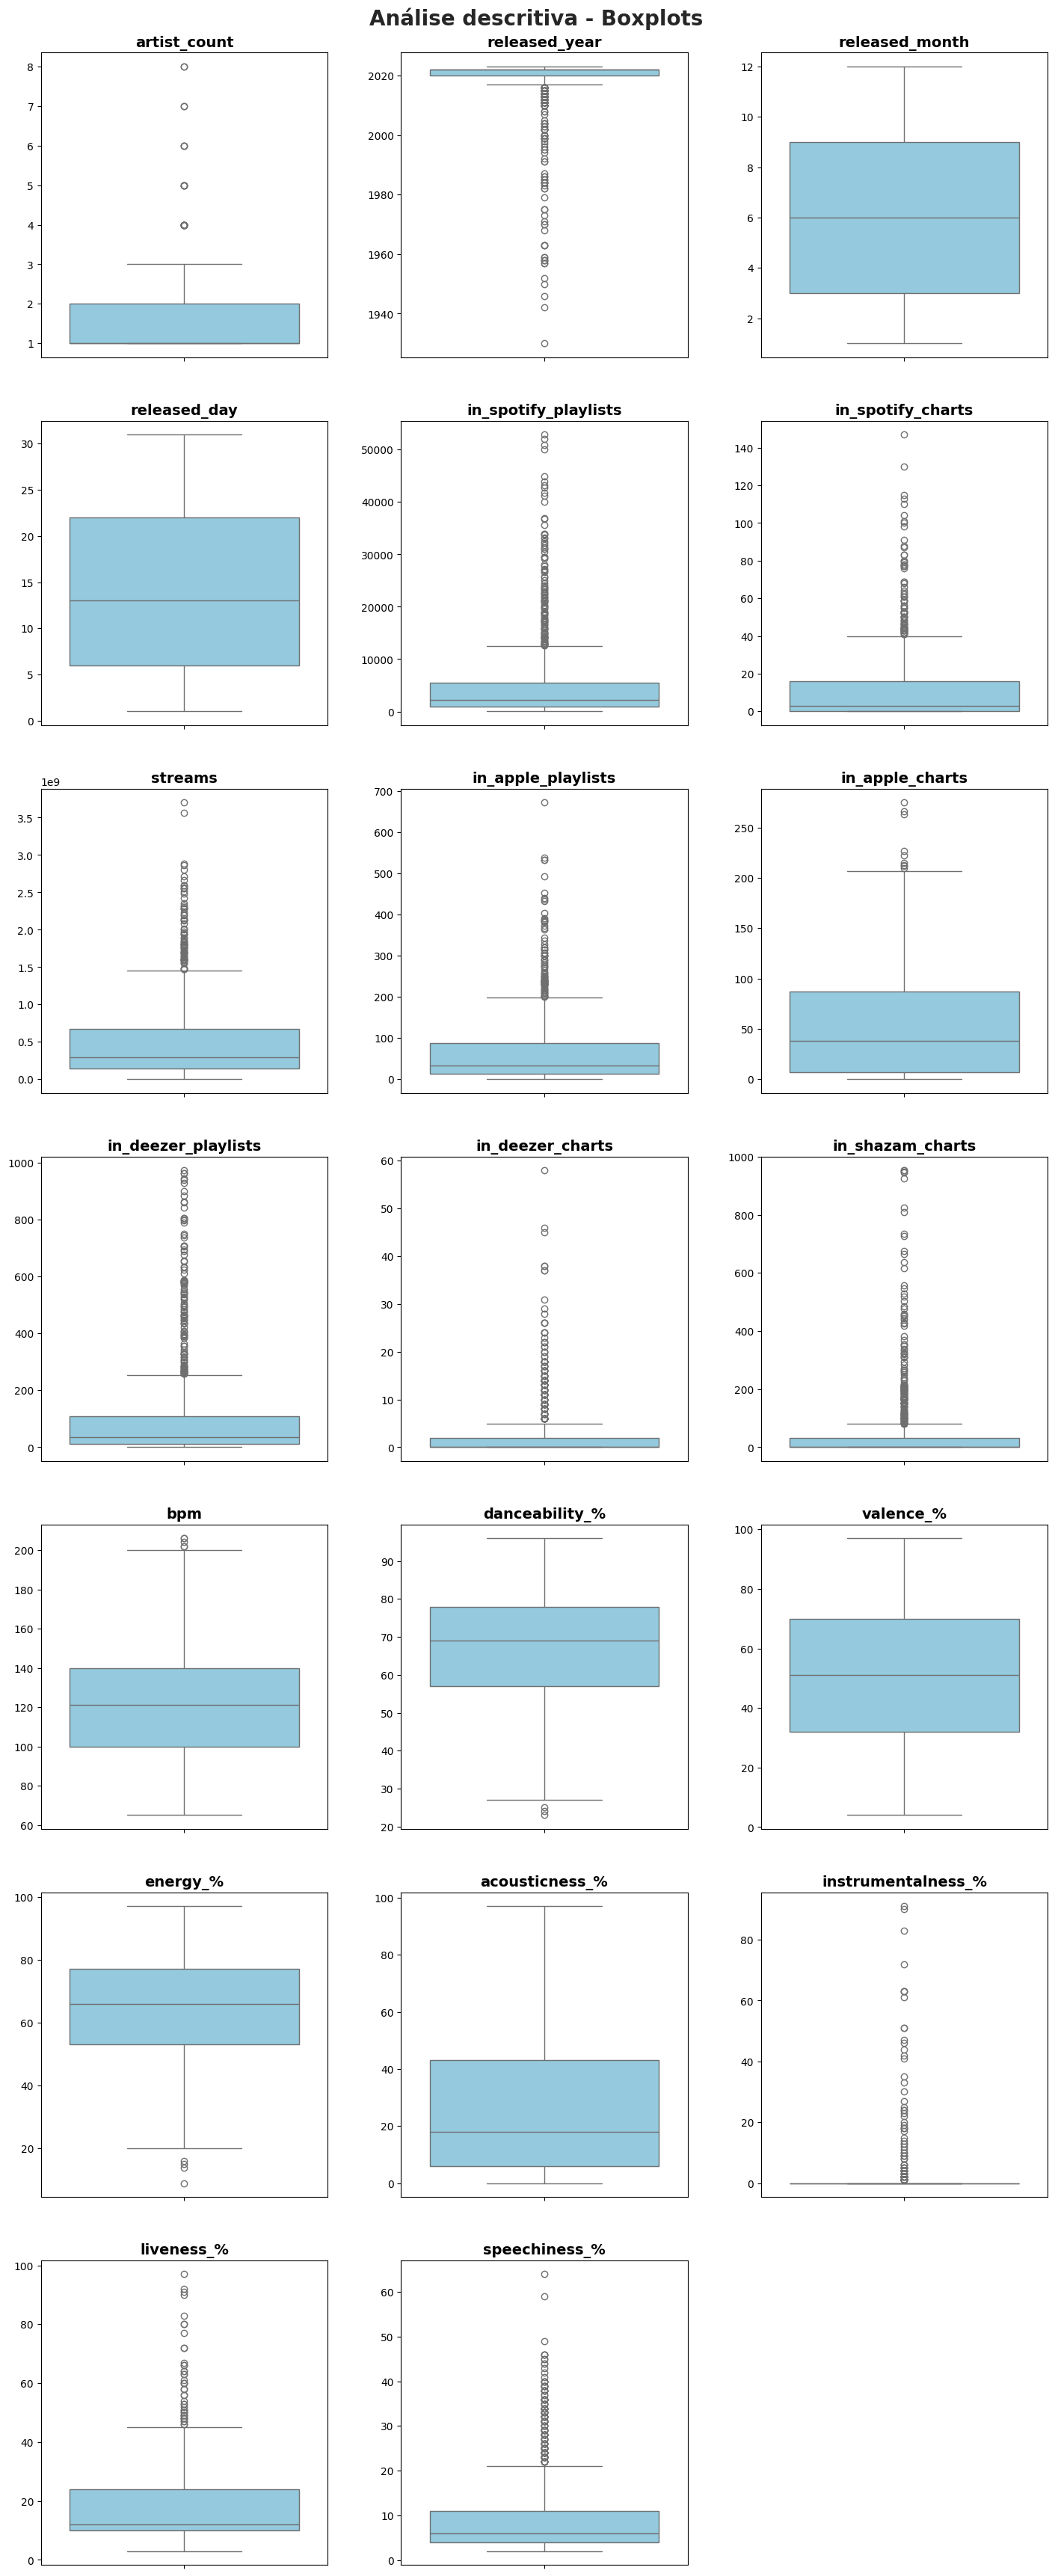

In [39]:
boxplots(df)

Podemos observar diversos insights quando plotamos os boxplots:
- A maioria das músicas possui até 3 artistas, mas existem algumas músicas com até 8 artistas;
- A maioria das músicas foi lançada entre 2018 e 2023, porém existem diversas músicas que foram lançadas antes disso, até antes de 1940;
- A maioria das músicas está presente em até cerca de 12 mil playlists, mas existem músicas que estão presentes em mais de 50 mil playlists;
- A maioria das músicas foram tocadas algumas centenas de milhões de vezes, mas algumas músicas foram tocadas mais de 2 bilhões de vezes.

### **Visualização Histograma**

In [40]:
def histograms_var_num(dataframe):
  """
  Função para gerar histogramas das variáveis numéricas de um DataFrame utilizando a curva KDE (Kernel Density Estimation) como correção.

  Args:
      dataframe: DataFrame contendo as variáveis numéricas.
  """
  # selecionando as colunas numéricas
  numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

  # definindo o número de linhas
  nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

  # criando o painel dos gráficos
  fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(14, nrows * 4))

  # ajustando o layout
  plt.tight_layout(pad=4)

  # configurando o estilo e a paleta de cores
  sns.set_style('whitegrid')

  # plotando os histogramas com KDE
  for i, column in enumerate(numeric_columns):
    sns.histplot(data=dataframe, x=dataframe[column], kde=True, ax=axes[i//3, i%3], color='skyblue', bins = 30)
    axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    axes[i//3, i%3].set_ylabel('Frequência')
    axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

  # removendo os gráficos vazios (se existir)
  for j in range(i+1, nrows * 3):
    fig.delaxes(axes.flatten()[j])

  # adicionando um título a imagem geral
  fig.suptitle("Análise descritiva - Histogramas", fontsize=20, fontweight='bold', y=1.00)

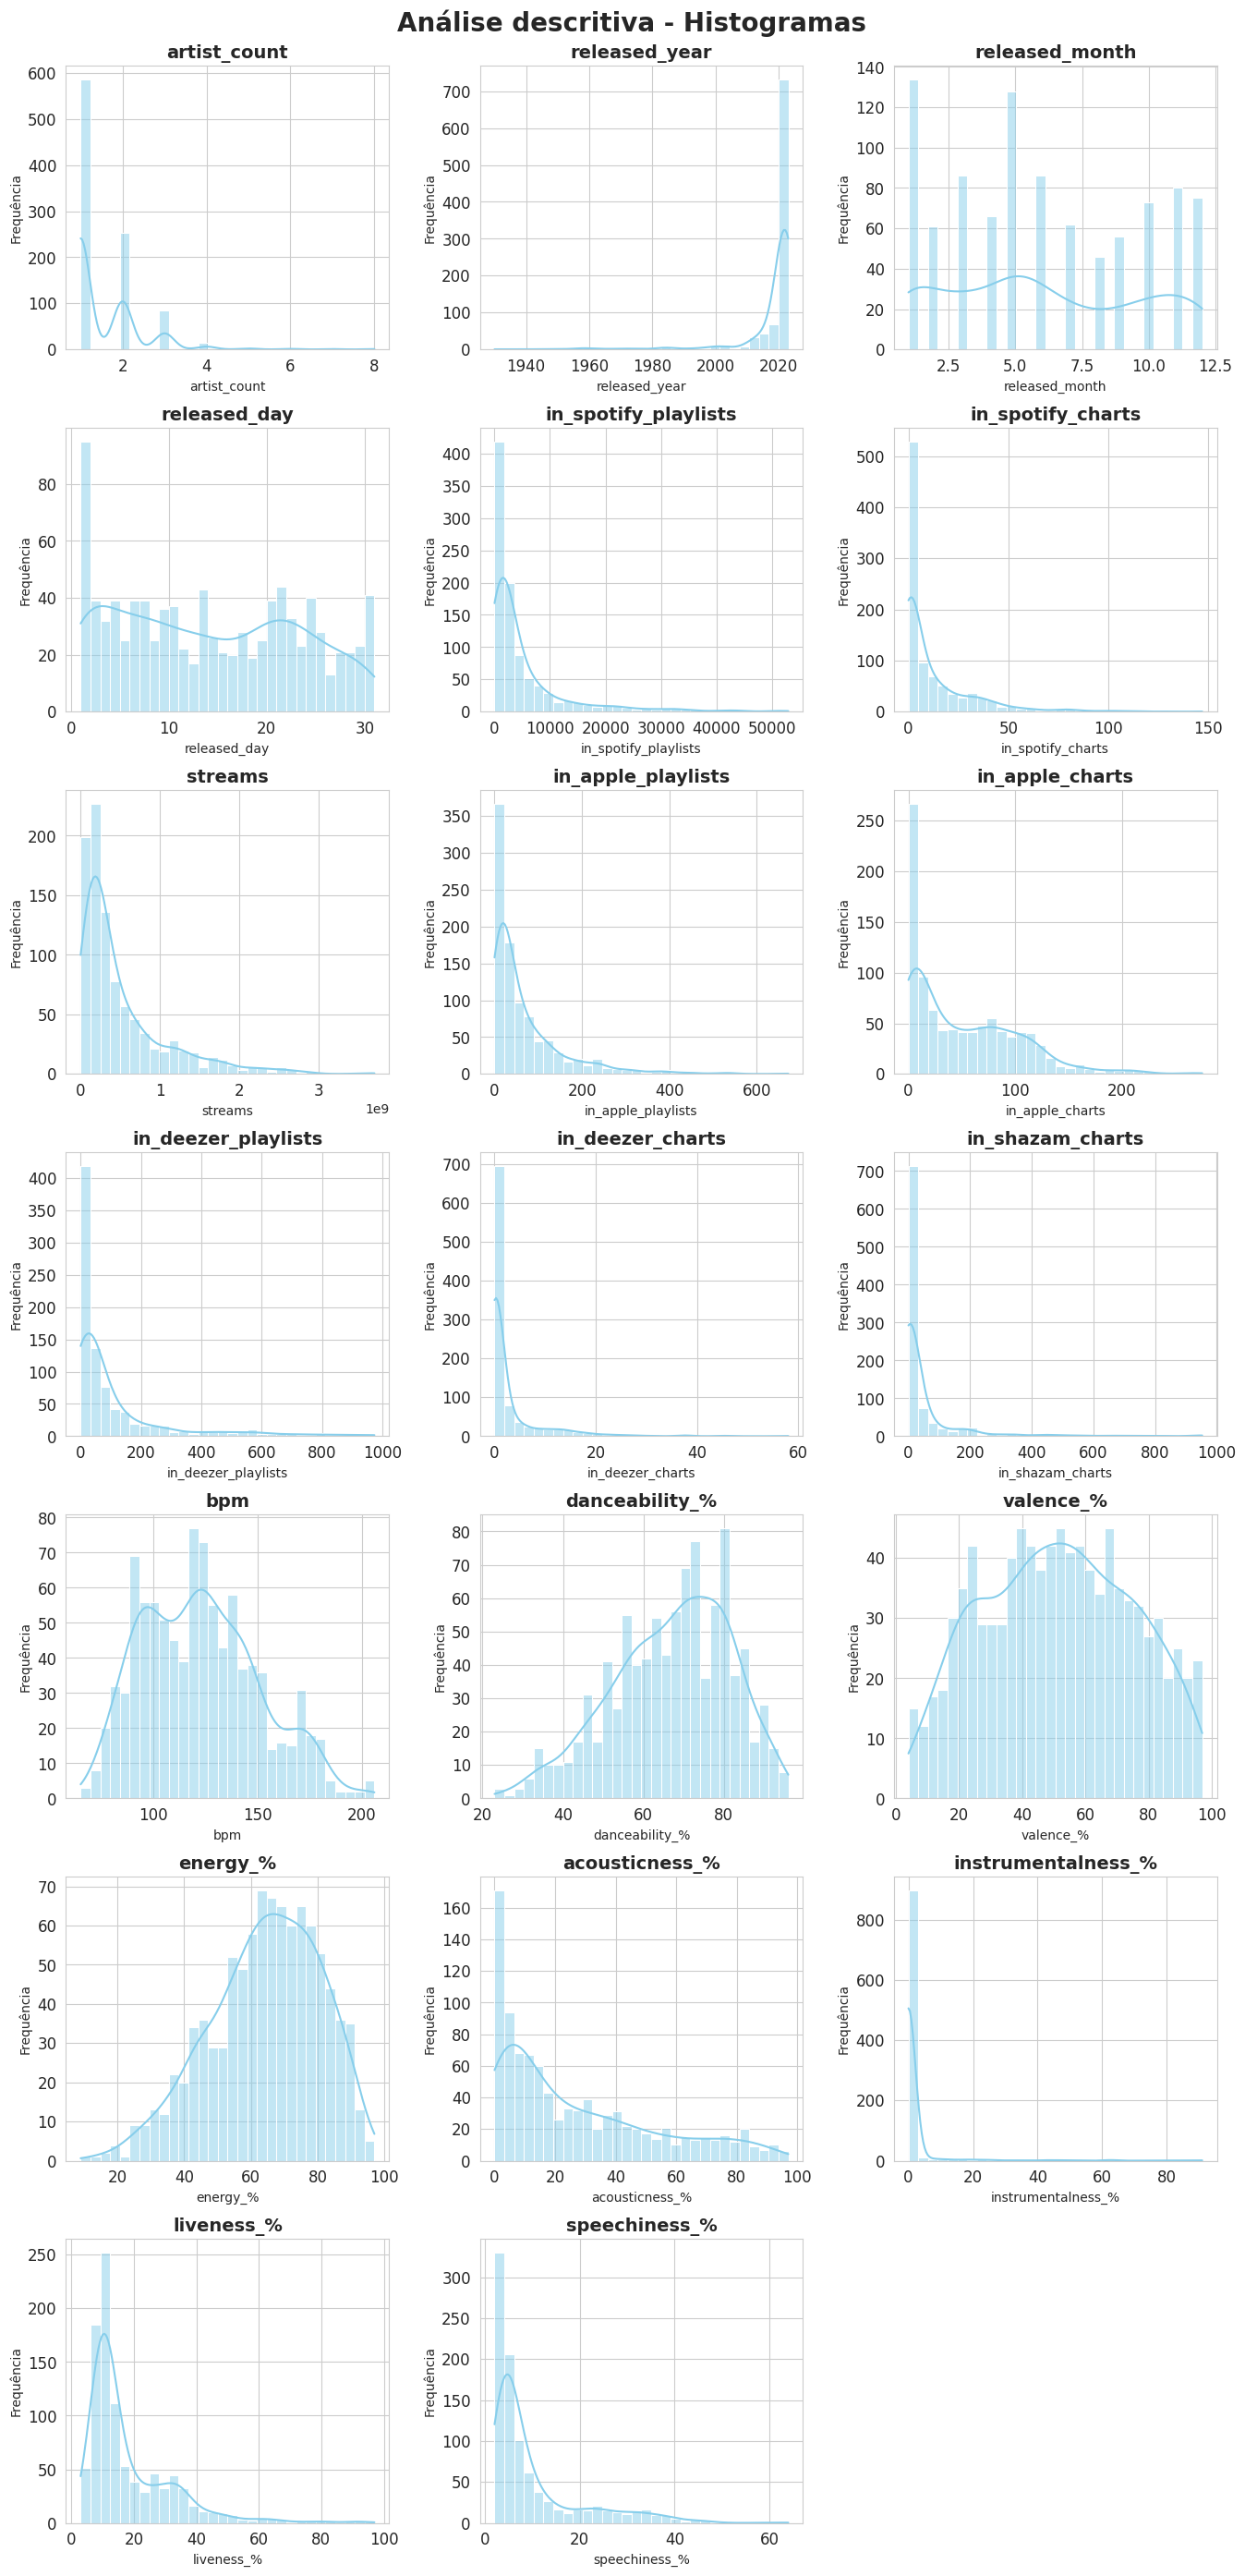

In [41]:
histograms_var_num(df)

## **Visualização Gráficos de Barras**

In [42]:
# selecionando as 10 músicas mais ouvidas
top_10_mais_ouvidas = df.sort_values(by='streams', ascending=False).reset_index(drop=True).head(10)
top_10_mais_ouvidas.index = top_10_mais_ouvidas.index + 1
top_10_mais_ouvidas

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url,release_date
1,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,Major,50,38,80,0,0,9,7,https://i.scdn.co/image/ab67616d0000b2738863bc...,2019-11-29
2,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,Minor,83,93,65,58,0,9,8,https://i.scdn.co/image/ab67616d0000b273ba5db4...,2017-01-06
3,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,Major,50,45,41,75,0,11,3,https://i.scdn.co/image/ab67616d0000b273fc2101...,2018-11-08
4,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,Minor,82,54,59,69,0,18,10,https://i.scdn.co/image/ab67616d0000b273c6f7af...,2019-05-10
5,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,Major,76,91,50,54,0,7,5,https://i.scdn.co/image/ab67616d0000b273e2e352...,2018-10-09
6,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,...,Major,77,36,63,1,0,36,5,https://i.scdn.co/image/ab67616d0000b2739416ed...,2016-04-04
7,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,...,Major,59,48,76,4,0,10,5,Not Found,2021-07-09
8,Believer,Imagine Dragons,1,2017,1,31,18986,23,2594040133,250,...,Minor,77,74,78,4,0,23,11,https://i.scdn.co/image/ab67616d0000b2735675e8...,2017-01-31
9,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2591224264,315,...,Major,75,64,52,41,0,11,3,https://i.scdn.co/image/ab67616d0000b273495ce6...,2016-05-31
10,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2565529693,281,...,Major,68,49,59,16,0,13,28,https://i.scdn.co/image/ab67616d0000b2734718e2...,2016-09-21


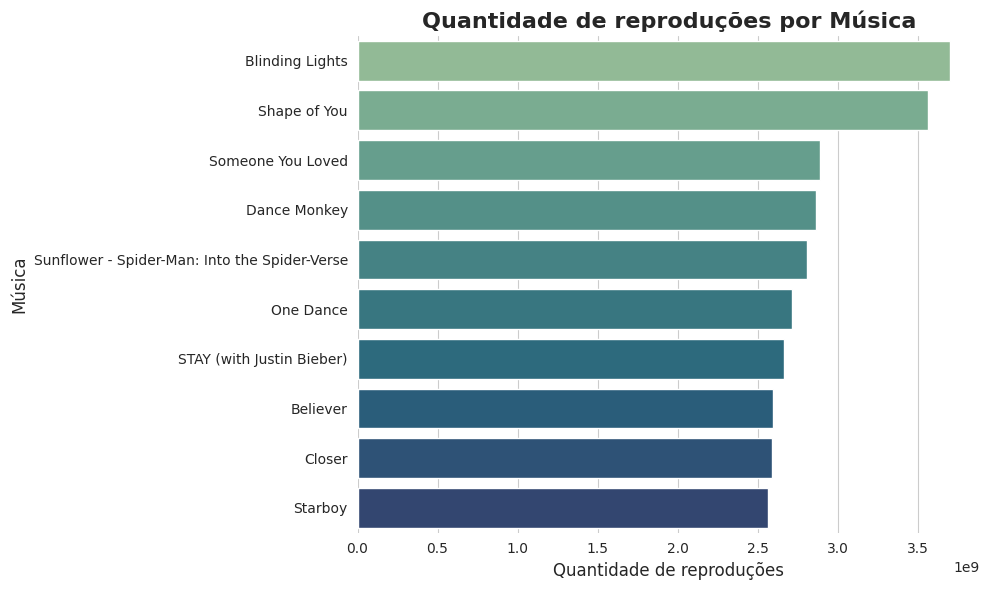

In [43]:
# plotando um gráfico de barras do top 10 músicas mais ouvidas
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_mais_ouvidas, x='streams', y='track_name', palette='crest')

plt.xticks(rotation=0)
plt.title('Quantidade de reproduções por Música', fontsize=16, fontweight='bold', y=1.00)
plt.xlabel('Quantidade de reproduções',fontsize=12)
plt.ylabel('Música', fontsize=12)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

É possível verificar que a música mais ouvida é 'Blinding Lights', com mais de 3.7 bilhões de reproduções, seguida de 'Shape of You' com mais de 3.5 bilhões e 'Someone You Loved' com 2.8 bilhões.

In [44]:
# selecionando os 10 artistas mais ouvidos
top_10_artistas = df.groupby('artist(s)_name', as_index=False)['streams'].sum().sort_values(by= 'streams', ascending=False).reset_index(drop=True).head(10)
top_10_artistas.index = top_10_artistas.index + 1
top_10_artistas

,artist(s)_name,streams
1,The Weeknd,14185552870
2,Taylor Swift,14053658300
3,Ed Sheeran,13908947204
4,Harry Styles,11608645649
5,Bad Bunny,9997799607
6,Olivia Rodrigo,7442148916
7,Eminem,6183805596
8,Bruno Mars,5846920599
9,Arctic Monkeys,5569806731
10,Imagine Dragons,5272484650


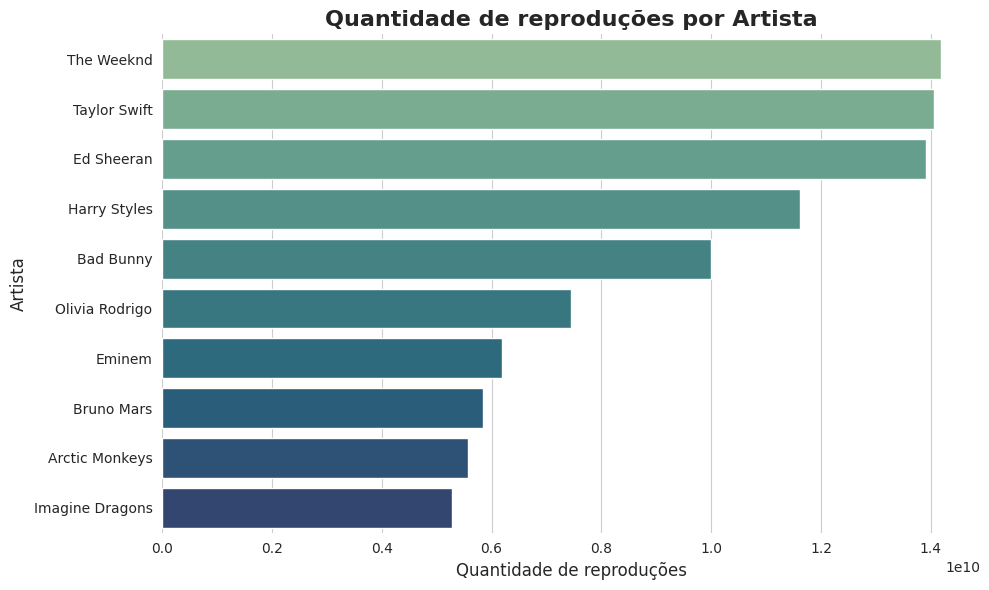

In [45]:
# plotando um gráfico de barras do top 10 artistas mais ouvidos
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_artistas, x='streams', y='artist(s)_name', palette='crest')

plt.xticks(rotation=0)
plt.title('Quantidade de reproduções por Artista', fontsize=16, fontweight='bold', y=1.00)
plt.xlabel('Quantidade de reproduções',fontsize=12)
plt.ylabel('Artista', fontsize=12)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

É possível verificar que The Weeknd é o artista mais ouvido, com cerca de 14,18 bilhões de reproduções, seguido de Taylor Swift com 14,05 bilhões e Ed Sheeran com 13,91 bilhões.
<br><br>
É importante também avaliar quantas músicas cada artista tem analisado nessa base dados.

In [46]:
# selecionado o top 10 artistas com mais músicas
top_10_artistas_com_mais_musicas = df.groupby('artist(s)_name', as_index=False)['track_name'].count().sort_values(by='track_name', ascending=False).reset_index(drop=True).head(10)
top_10_artistas_com_mais_musicas.rename(columns={'track_name': 'qtd_total_musicas'}, inplace=True)
top_10_artistas_com_mais_musicas.index = top_10_artistas_com_mais_musicas.index + 1
top_10_artistas_com_mais_musicas

,artist(s)_name,qtd_total_musicas
1,Taylor Swift,34
2,The Weeknd,22
3,SZA,19
4,Bad Bunny,19
5,Harry Styles,17
6,Kendrick Lamar,12
7,Morgan Wallen,11
8,Ed Sheeran,9
9,"Drake, 21 Savage",8
10,BTS,8


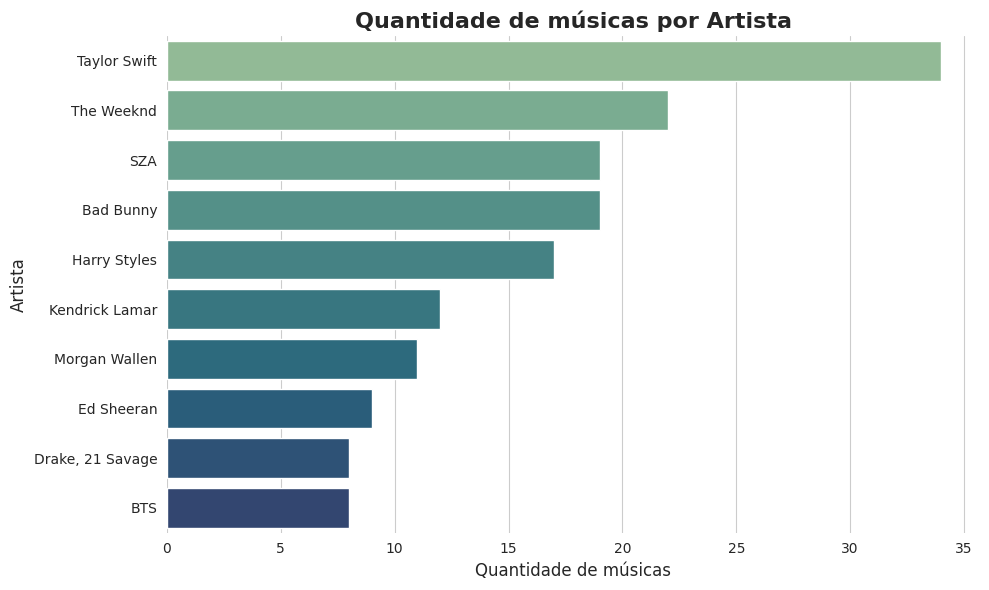

In [47]:
# plotando um gráfico de barras do top 10 artistas com mais músicas
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_artistas_com_mais_musicas, x='qtd_total_musicas', y='artist(s)_name', palette='crest')

plt.xticks(rotation=0)
plt.title('Quantidade de músicas por Artista', fontsize=16, fontweight='bold', y=1.00)
plt.xlabel('Quantidade de músicas',fontsize=12)
plt.ylabel('Artista', fontsize=12)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

Apesar de estar em primeiro lugar na quantidade de reproduções, The Weeknd possui apenas 22 músicas nesta base de dados, ficando em segundo lugar, atrás da Taylor Swift, que tem 34 músicas.

Como o spotify é a plataforma que tem mais visualizações e músicas em playlists, vamos analisar somente as músicas presentes nas playlist dele.

In [48]:
# selecionando as 10 músicas que mais estão em playlists do spotify
top_10_musicas_playlist_spotify = df.sort_values(by='in_spotify_playlists', ascending=False).reset_index(drop=True).head(10)
top_10_musicas_playlist_spotify.index = top_10_musicas_playlist_spotify.index + 1
top_10_musicas_playlist_spotify

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url,release_date
1,Get Lucky - Radio Edit,"Pharrell Williams, Nile Rodgers, Daft Punk",3,2013,1,1,52898,0,933815613,203,...,Minor,79,87,81,4,0,10,4,Not Found,2013-01-01
2,Mr. Brightside,The Killers,1,2003,9,23,51979,15,1806617704,306,...,Major,35,24,93,0,0,10,8,https://i.scdn.co/image/ab67616d0000b273ccdddd...,2003-09-23
3,Wake Me Up - Radio Edit,Avicii,1,2013,1,1,50887,34,1970673297,315,...,Major,53,66,78,0,0,16,5,https://i.scdn.co/image/ab67616d0000b2731d7b05...,2013-01-01
4,Smells Like Teen Spirit - Remastered 2021,Nirvana,1,1991,9,10,49991,9,1690192927,265,...,Major,52,73,91,0,0,11,7,https://i.scdn.co/image/ab67616d0000b2739aa37e...,1991-09-10
5,Take On Me,a-ha,1,1984,10,19,44927,17,1479115056,34,...,Minor,57,86,90,2,0,9,5,https://i.scdn.co/image/ab67616d0000b273e8dd4d...,1984-10-19
6,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,Major,50,38,80,0,0,9,7,https://i.scdn.co/image/ab67616d0000b2738863bc...,2019-11-29
7,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,...,Major,77,36,63,1,0,36,5,https://i.scdn.co/image/ab67616d0000b2739416ed...,2016-04-04
8,Somebody That I Used To Know,"Gotye, Kimbra",2,2011,1,1,42798,0,1457139296,217,...,Major,86,75,52,54,0,10,4,https://i.scdn.co/image/ab67616d0000b273e1d47c...,2011-01-01
9,Everybody Wants To Rule The World,Tears For Fears,1,1985,2,17,41751,25,1205951614,101,...,Major,64,54,81,36,0,11,6,https://i.scdn.co/image/ab67616d0000b27322463d...,1985-02-17
10,Sweet Child O' Mine,Guns N' Roses,1,1987,1,1,41231,1,1553497987,228,...,Major,45,67,90,9,11,10,5,https://i.scdn.co/image/ab67616d0000b27321ebf4...,1987-01-01


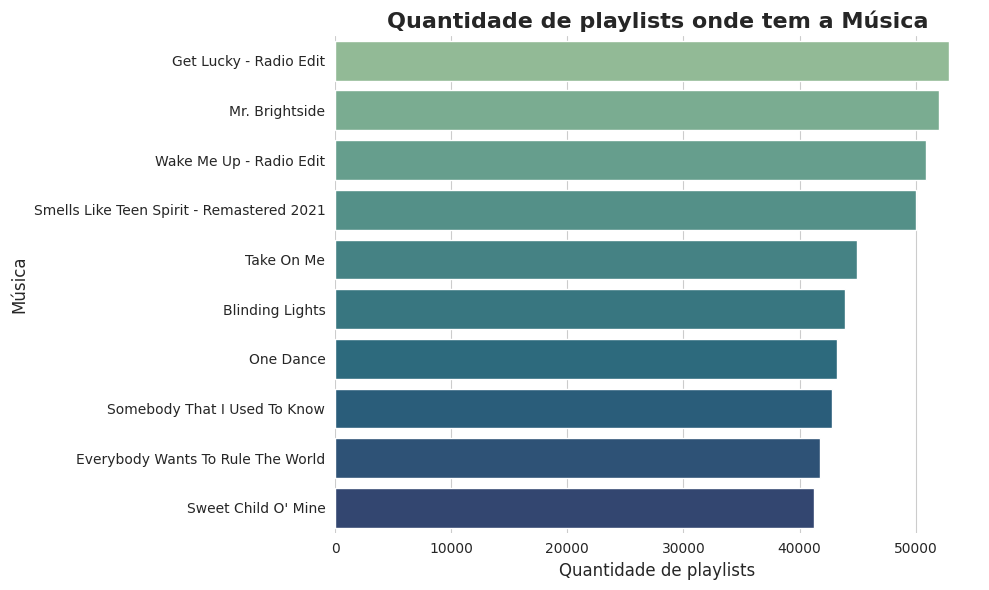

In [49]:
# plotando um gráfico com as 10 músicas que mais estão em playlists do spotify
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_musicas_playlist_spotify, x='in_spotify_playlists', y='track_name', palette='crest')

plt.xticks(rotation=0)
plt.title('Quantidade de playlists onde tem a Música', fontsize=16, fontweight='bold', y=1.00)
plt.xlabel('Quantidade de playlists',fontsize=12)
plt.ylabel('Música', fontsize=12)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

Apesar de termos músicas que aparecem em mais de 50 mil playlists, essas músicas não aparecem no top 10 mais ouvidas, o que pode indicar que a quantidade de reproduções de cada música independe de em quantas playlists essa música aparece.

### **Avaliando os atributos musicais**

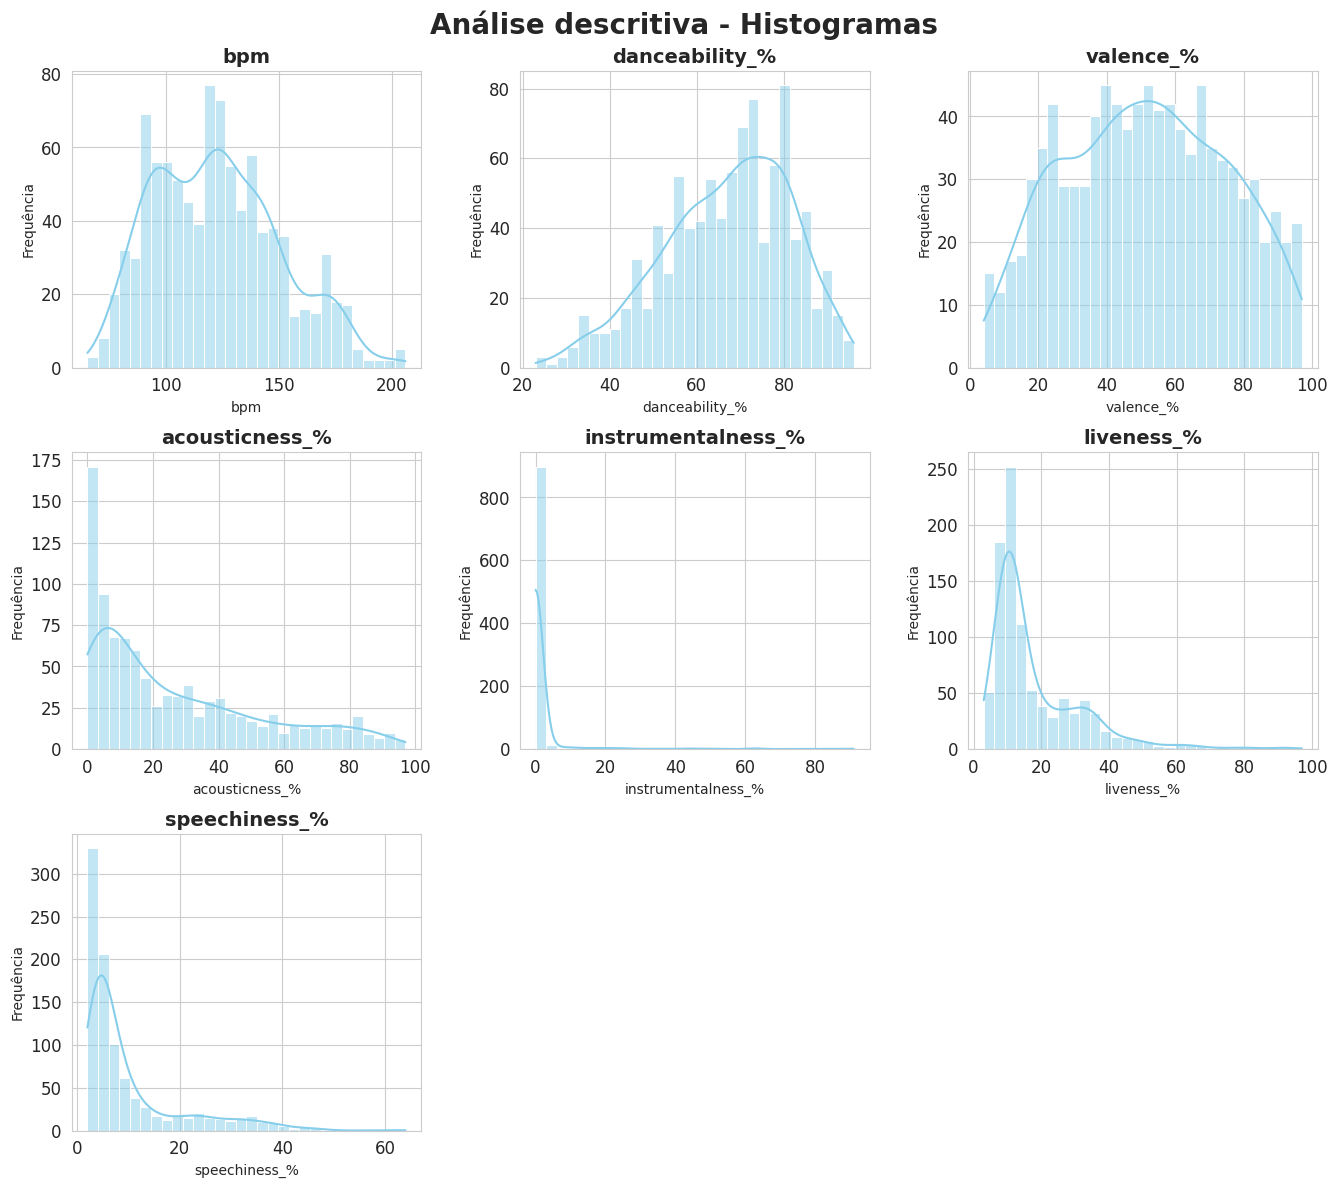

In [50]:
# separando as colunas que queremos analisar
colunas_atributos = df[['bpm','danceability_%','valence_%','acousticness_%',
           'instrumentalness_%','liveness_%','speechiness_%']]

# plotando os histogramas dessas colunas
histograms_var_num(colunas_atributos)

Visualizando os histogramas podemos identificar algumas características:
- A maioria das músicas tem entre 80 e 130 batidas por minuto;
- O nível de dançabilidade da maioria das músicas está entre 60 e 80%;
- Se considerarmos 'valence' = 0 uma música triste e 'valende' = 100 uma música altamente feliz, então a maior parte das músicas tem um carácter neutro;
- Temos alguns elementos acústicos na maior parte das músicas, porém o valor é considerável em apenas uma pequena parte delas;
- Quase não temos conteúdo instrumental considerável nas músicas;
- Temos menos 40% de presença de elementos típicos de apresentações ao vivo na maioria das músicas;
- temos grandes quantidades de músicas onde poucas palavras são pronunciadas.



In [51]:
# organizando o df pelas músicas mais ouvidas
df_mais_ouvidas = df.sort_values(by='streams', ascending=False).reset_index(drop=True)
df_mais_ouvidas.index = df_mais_ouvidas.index + 1
df_mais_ouvidas.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url,release_date
1,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,Major,50,38,80,0,0,9,7,https://i.scdn.co/image/ab67616d0000b2738863bc...,2019-11-29
2,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,Minor,83,93,65,58,0,9,8,https://i.scdn.co/image/ab67616d0000b273ba5db4...,2017-01-06
3,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,Major,50,45,41,75,0,11,3,https://i.scdn.co/image/ab67616d0000b273fc2101...,2018-11-08
4,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,Minor,82,54,59,69,0,18,10,https://i.scdn.co/image/ab67616d0000b273c6f7af...,2019-05-10
5,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,Major,76,91,50,54,0,7,5,https://i.scdn.co/image/ab67616d0000b273e2e352...,2018-10-09
6,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,...,Major,77,36,63,1,0,36,5,https://i.scdn.co/image/ab67616d0000b2739416ed...,2016-04-04
7,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,...,Major,59,48,76,4,0,10,5,Not Found,2021-07-09
8,Believer,Imagine Dragons,1,2017,1,31,18986,23,2594040133,250,...,Minor,77,74,78,4,0,23,11,https://i.scdn.co/image/ab67616d0000b2735675e8...,2017-01-31
9,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2591224264,315,...,Major,75,64,52,41,0,11,3,https://i.scdn.co/image/ab67616d0000b273495ce6...,2016-05-31
10,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2565529693,281,...,Major,68,49,59,16,0,13,28,https://i.scdn.co/image/ab67616d0000b2734718e2...,2016-09-21


In [52]:
# criando uma coluna para indicar se a música está no top 100 ou não
df_mais_ouvidas['top_100'] = 0
df_mais_ouvidas.loc[:100, 'top_100'] = 1

In [53]:
df_mais_ouvidas.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url,release_date,top_100
1,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,50,38,80,0,0,9,7,https://i.scdn.co/image/ab67616d0000b2738863bc...,2019-11-29,1
2,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,83,93,65,58,0,9,8,https://i.scdn.co/image/ab67616d0000b273ba5db4...,2017-01-06,1
3,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,50,45,41,75,0,11,3,https://i.scdn.co/image/ab67616d0000b273fc2101...,2018-11-08,1
4,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,82,54,59,69,0,18,10,https://i.scdn.co/image/ab67616d0000b273c6f7af...,2019-05-10,1
5,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,76,91,50,54,0,7,5,https://i.scdn.co/image/ab67616d0000b273e2e352...,2018-10-09,1
6,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,...,77,36,63,1,0,36,5,https://i.scdn.co/image/ab67616d0000b2739416ed...,2016-04-04,1
7,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,...,59,48,76,4,0,10,5,Not Found,2021-07-09,1
8,Believer,Imagine Dragons,1,2017,1,31,18986,23,2594040133,250,...,77,74,78,4,0,23,11,https://i.scdn.co/image/ab67616d0000b2735675e8...,2017-01-31,1
9,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2591224264,315,...,75,64,52,41,0,11,3,https://i.scdn.co/image/ab67616d0000b273495ce6...,2016-05-31,1
10,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2565529693,281,...,68,49,59,16,0,13,28,https://i.scdn.co/image/ab67616d0000b2734718e2...,2016-09-21,1


In [54]:
df_mais_ouvidas.tail(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url,release_date,top_100
944,Better Than Revenge (Taylor's Version),Taylor Swift,1,2023,7,7,86,11,30343206,3,...,50,67,89,0,0,19,8,https://i.scdn.co/image/ab67616d0000b2730b04da...,2023-07-07,0
945,New Jeans,NewJeans,1,2023,7,7,77,35,29562220,8,...,81,53,72,51,0,12,5,https://i.scdn.co/image/ab67616d0000b2733d98a0...,2023-07-07,0
946,Danger (Spider) (Offset & JID),"Offset, JID",2,2023,6,2,214,0,24975653,3,...,83,25,69,4,0,23,12,https://i.scdn.co/image/ab67616d0000b2736ed9ae...,2023-06-02,0
947,Rush,Troye Sivan,1,2023,7,13,864,78,22581161,71,...,74,35,84,0,0,11,6,https://i.scdn.co/image/ab67616d0000b273a4ffb2...,2023-07-13,0
948,S91,Karol G,1,2023,7,14,525,41,16011326,34,...,86,42,72,59,0,9,19,https://i.scdn.co/image/ab67616d0000b273890cfb...,2023-07-14,0
949,Overdrive,Post Malone,1,2023,7,14,410,36,14780425,36,...,56,48,73,0,0,35,4,https://i.scdn.co/image/ab67616d0000b27372694f...,2023-07-14,0
950,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,2023,6,1,293,8,11956641,5,...,93,68,65,42,0,12,25,https://i.scdn.co/image/ab67616d0000b27319d608...,2023-06-01,0
951,QUEMA,"Sog, Ryan Castro, Peso Pluma",3,2023,7,13,437,31,11599388,17,...,79,92,89,5,0,6,5,Not Found,2023-07-13,0
952,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",6,2022,12,22,138,4,1365184,13,...,82,62,74,10,0,33,7,Not Found,2022-12-22,0
953,Que Vuelvas,"Carin Leon, Grupo Frontera",2,2022,12,9,763,26,2762,21,...,49,78,64,19,0,11,4,https://i.scdn.co/image/ab67616d0000b2735c7336...,2022-12-09,0


In [55]:
df_mais_ouvidas['top_100'].value_counts()

,count
top_100,
0,853
1,100


In [56]:
df_top_100 = df_mais_ouvidas[df_mais_ouvidas['top_100'] == 1]
df_top_100.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url,release_date,top_100
1,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,50,38,80,0,0,9,7,https://i.scdn.co/image/ab67616d0000b2738863bc...,2019-11-29,1
2,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,83,93,65,58,0,9,8,https://i.scdn.co/image/ab67616d0000b273ba5db4...,2017-01-06,1
3,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,50,45,41,75,0,11,3,https://i.scdn.co/image/ab67616d0000b273fc2101...,2018-11-08,1
4,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,82,54,59,69,0,18,10,https://i.scdn.co/image/ab67616d0000b273c6f7af...,2019-05-10,1
5,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,76,91,50,54,0,7,5,https://i.scdn.co/image/ab67616d0000b273e2e352...,2018-10-09,1
6,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,...,77,36,63,1,0,36,5,https://i.scdn.co/image/ab67616d0000b2739416ed...,2016-04-04,1
7,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,...,59,48,76,4,0,10,5,Not Found,2021-07-09,1
8,Believer,Imagine Dragons,1,2017,1,31,18986,23,2594040133,250,...,77,74,78,4,0,23,11,https://i.scdn.co/image/ab67616d0000b2735675e8...,2017-01-31,1
9,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2591224264,315,...,75,64,52,41,0,11,3,https://i.scdn.co/image/ab67616d0000b273495ce6...,2016-05-31,1
10,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2565529693,281,...,68,49,59,16,0,13,28,https://i.scdn.co/image/ab67616d0000b2734718e2...,2016-09-21,1


In [57]:
lancamentos_por_ano = df_top_100.groupby(df_top_100['release_date'].dt.year).size().reset_index(name='quantidade')
lancamentos_por_ano

,release_date,quantidade
0,1975,2
1,1983,1
2,1984,1
3,1987,1
4,1991,1
5,1994,1
6,1995,1
7,1998,1
8,1999,1
9,2000,2


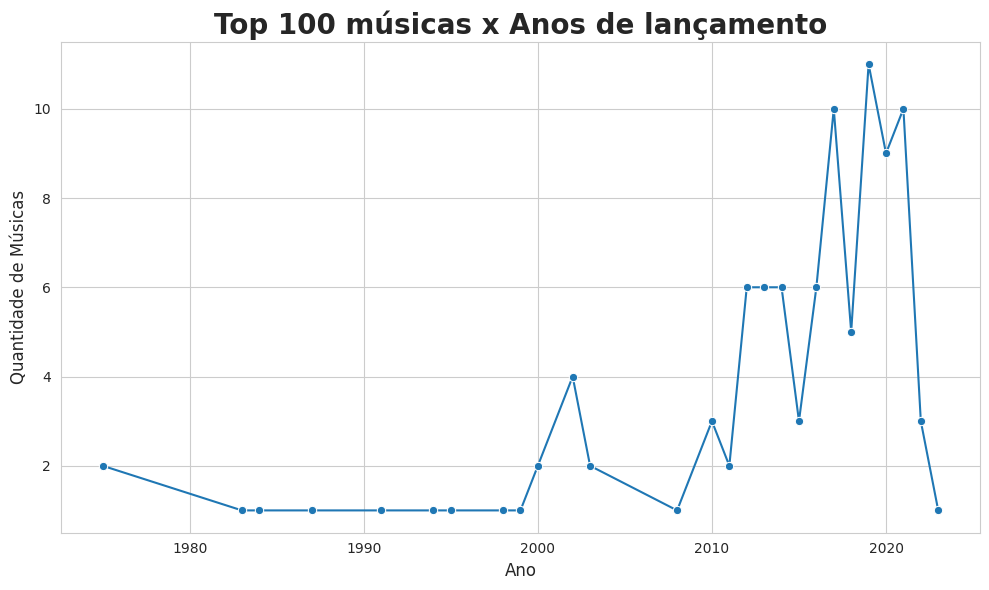

In [58]:
# plotando a quantidade de músicas lançadas por ano considerando o top 100 musicas
plt.figure(figsize=(10, 6))
sns.lineplot(data = lancamentos_por_ano, x='release_date', y='quantidade', marker='o')


"""
# Adiciona o número em cada ponto
for x, y in zip(lancamentos_por_ano.release_date, lancamentos_por_ano.quantidade):
    plt.text(x, y + 0.1, str(y), ha='center', va='bottom', fontsize=9)
"""

plt.title('Top 100 músicas x Anos de lançamento', fontsize=20, fontweight='bold', y=1.00)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade de Músicas', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

É possível observar que dentro do Top 100 temos algumas músicas lançadas antes do ano 2000, porém após 2010 tivemos uma grande quantidade de músicas que foram sucesso.

## **Análises multivariadas**

### **KDE Plots**

In [59]:

def kdeplots_var_num_target(dataframe, target_column):
  """
  Função para gerar gráficos KDE das variáveis numéricas em relação à variável alvo.

  Args:
  :dataframe: DataFrame contendo as variáveis numéricas e a variável alvo.
  :target_column: Nome da coluna da variável alvo.
  """
  # selecionando as colunas numéricas
  numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

  # definindo o numero de linhas com base no numero de colunas numéricas
  nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

  fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(14, nrows * 4))

  # ajustando o layout
  plt.tight_layout(pad=4)

  # configurando o estilo e a paleta de cores
  sns.set_style('whitegrid')

  # plotando os kdeplots
  for i, column in enumerate(numeric_columns):
    sns.kdeplot(data=dataframe[dataframe[target_column] == 1][column], ax=axes[i//3,i%3], color='blue', label='1', fill=True, warn_singular=False)
    sns.kdeplot(data=dataframe[dataframe[target_column] == 0][column], ax=axes[i//3,i%3], color='red', label='0', fill=True, warn_singular=False)
    axes[i//3,i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    axes[i//3,i%3].set_ylabel('Densidade')
    axes[i//3,i%3].tick_params(axis='both', which='major', labelsize=12)
    if i == 0:
      axes[i//3,i%3].legend(title=target_column)

  # removendo gráficos vazios (se existir)
  for j in range(i+1, nrows * 3):
    fig.delaxes(axes.flatten()[j])

  # adicionando um titulo principal
  fig.suptitle("Análise Multivariada - KDE Plot", fontsize=20, fontweight='bold', y=1.00)

  plt.show()


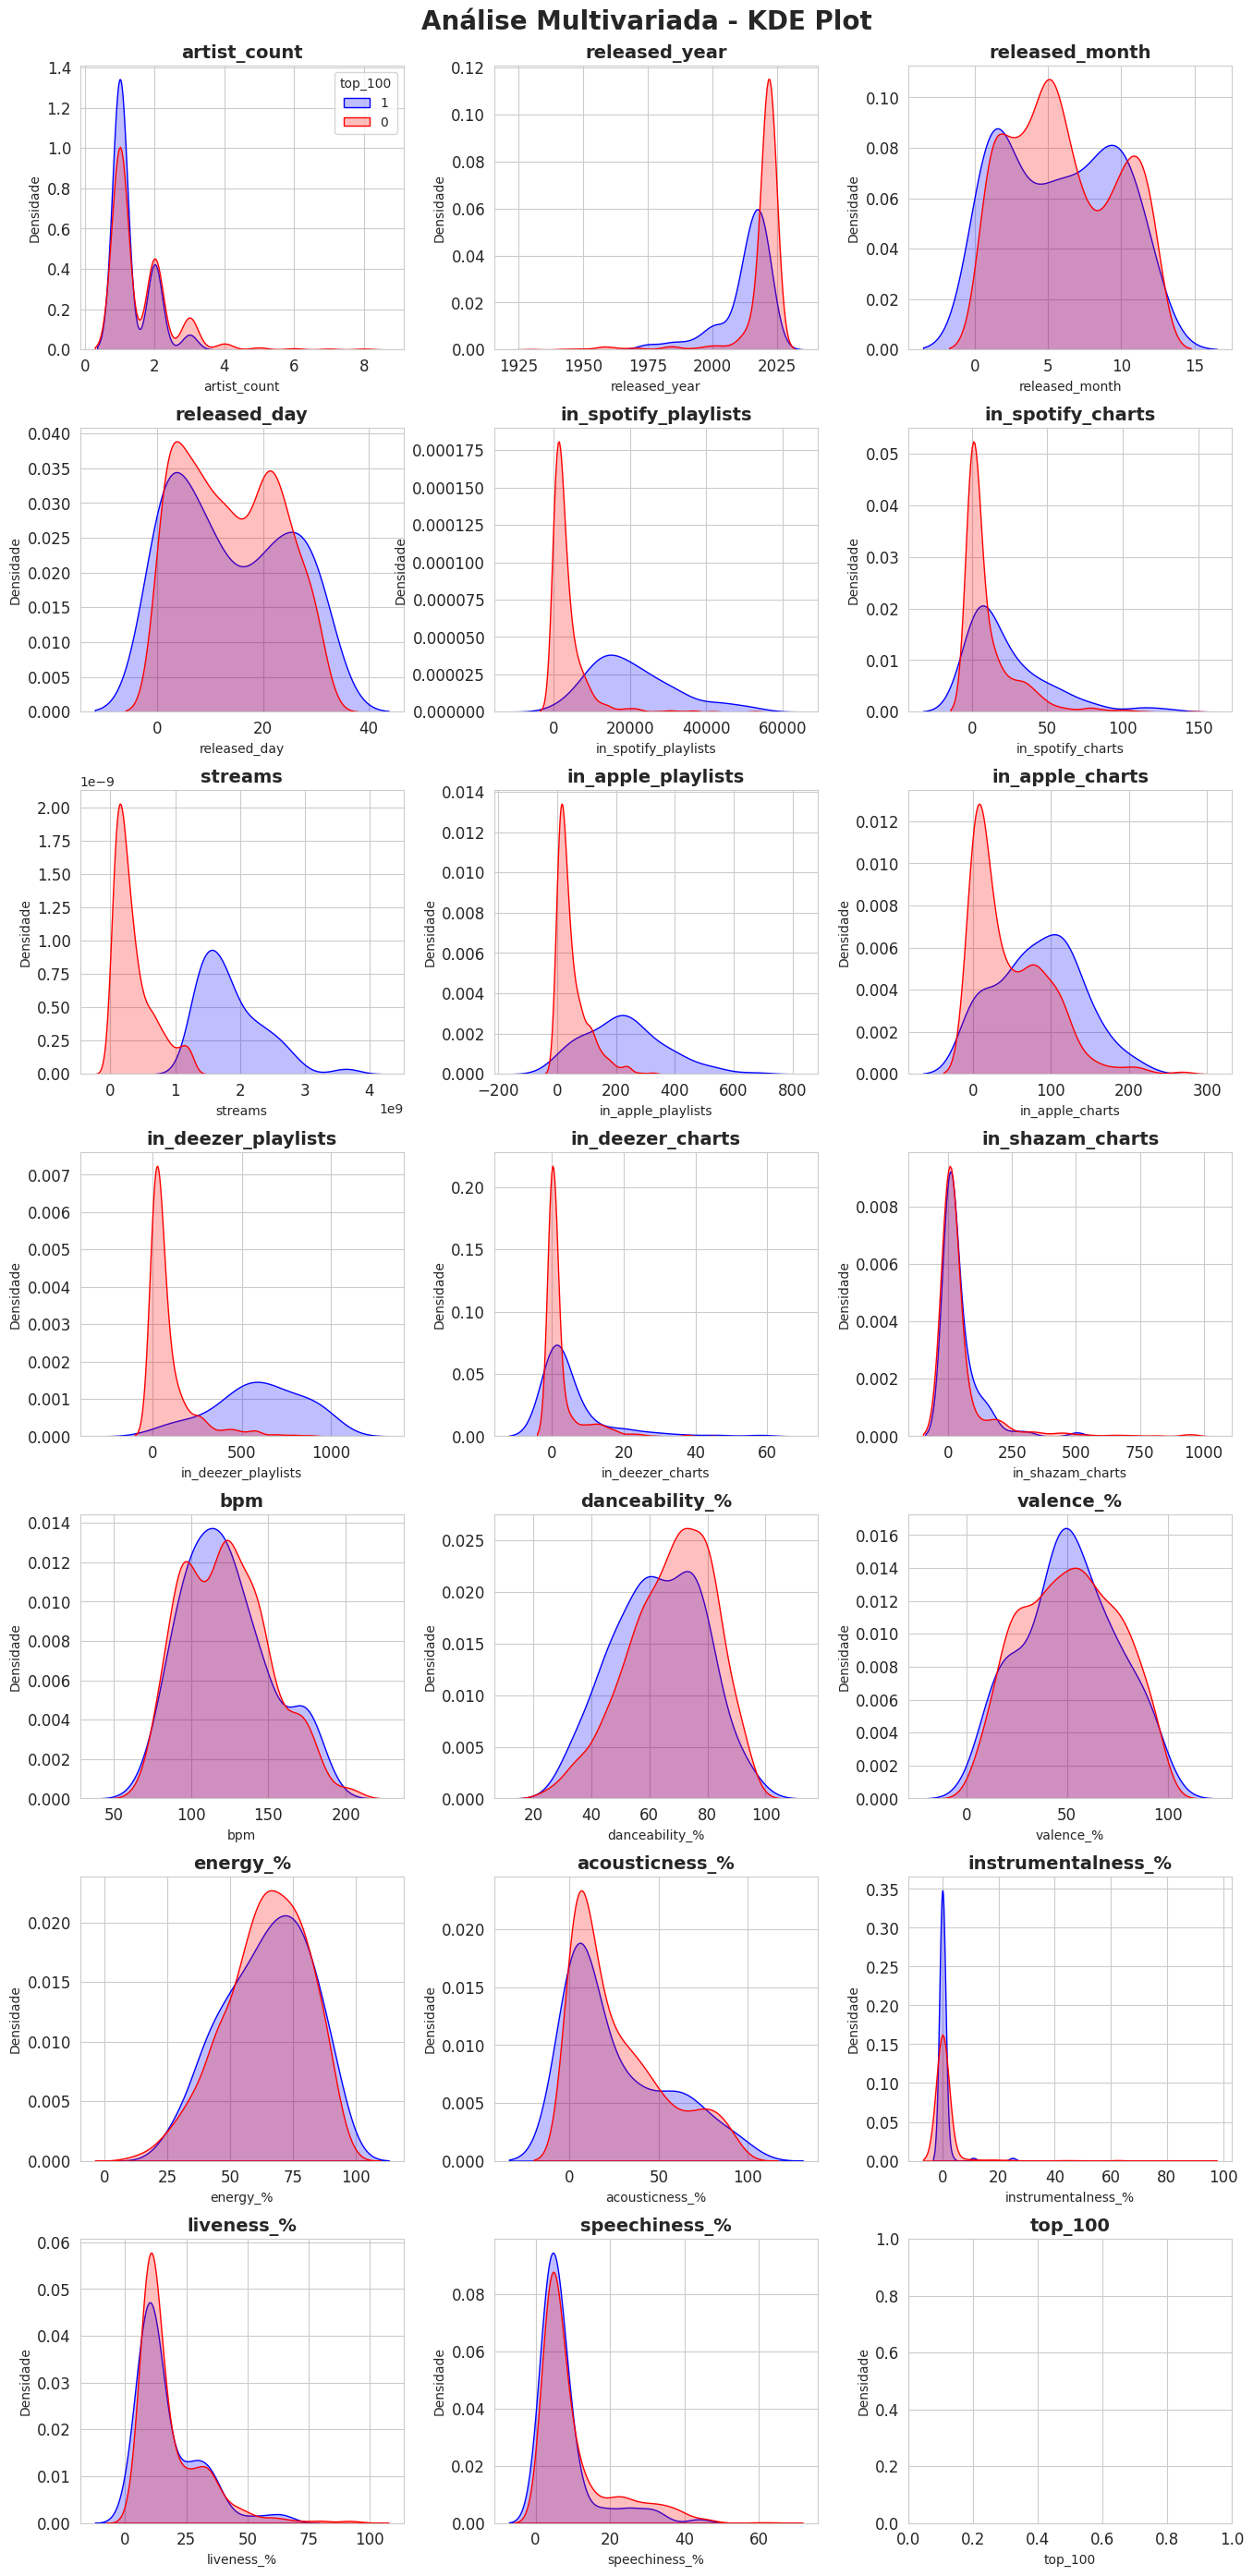

In [60]:
kdeplots_var_num_target(df_mais_ouvidas, 'top_100')

Podemos considerar alguns pontos olhando esse KDE Plot:
- A maior parte das músicas que estão no top 100 possuem 1 ou 2 artistas ou bandas, diferente das outras que tem até 8 artistas;
- Temos músicas no top 100 que estão em poucas playlists, mas a maioria das músicas estão em muitas playlists, diferente das músicas fora do top 100, onde a grande maioria estão em poucas playlists;
- Grande parte das músicas do top 100 tem entre 80 e 140 batidas por minuto, um ritmo parecido com as músicas foras do top 100;
- Se comparado com as músicas fora do top 100, as músicas do top 100 tem uma dançabilidade mais baixa;
-  A maior parte das músicas do top 100 possuem 'valence' perto de 50%, ou seja, não transmitem nem felicidade nem tristeza, diferente das músicas de fora do top 100, que são mais felizes ou mais triste.
<br><br>

As ouras características não tem tanta diferença entre as músicas do top 100 e fora dele.

## **Insights**
<br>

Se pegarmos o Top 10 músicas mais tocadas e pesquisarmos os gêneros dos cantores ou bandas, podemos identificar quais os gêneros mais tocados:

| Nº | Artista(s)                   | Gêneros Musicais Principais            |
| -- | ---------------------------- | -------------------------------------- |
| 1  | The Weeknd                   | R\&B alternativo, Pop, Synthpop        |
| 2  | Ed Sheeran                   | Pop, Pop Rock, Folk Pop                |
| 3  | Lewis Capaldi                | Pop, Pop Rock, Soul                    |
| 4  | Tones and I                  | Indie Pop, Electropop, Alternative Pop |
| 5  | Post Malone, Swae Lee        | Hip Hop, Trap, Pop Rap, R\&B           |
| 6  | Drake, WizKid, Kyla          | Dancehall, Afrobeat, R\&B, Pop         |
| 7  | Justin Bieber, The Kid Laroi | Pop, Hip Hop, Pop Rap                  |
| 8  | Imagine Dragons              | Pop Rock, Electropop, Alternative Rock |
| 9  | The Chainsmokers, Halsey     | Electropop, EDM, Pop                   |
| 10 | The Weeknd, Daft Punk        | Synthpop, R\&B, Electronic             |

<br><br>

Podemos observar que gêneros como o **Pop** e variações como **Pop Rock**, **Folk Pop** e **Electropop** são gêneros que atraem uma grande quantidade de pessoas, então o ideal seria investir nesse tipo de gênero.

Também podemos verificar que "Feats." também atraem boa parte do público, então pode ser interessante criar este tipo de conteúdo.
<br><br>

Outros pontos em relação aos artistas e playlists são:

- A maior parte das músicas que estão no top 10 possuem no máximo 3 artistas ou bandas, diferente das outras que tem até 8 artistas;
- Temos músicas no top 100 que estão em poucas playlists, mas a maioria das músicas estão em muitas playlists, diferente das músicas fora do top 100, onde a grande maioria estão em poucas playlists;
<br><br>

Pensando sobre os atributos musicais, podemos dizer o seguinte:

- Grande parte das músicas do top 100 tem entre 80 e 140 batidas por minuto, um ritmo parecido com as músicas foras do top 100;
- Se comparado com as músicas fora do top 100, as músicas do top 100 tem uma dançabilidade mais baixa;
-  A maior parte das músicas do top 100 possuem 'valence' perto de 50%, ou seja, não transmitem nem felicidade nem tristeza, diferente das músicas de fora do top 100, que são mais felizes ou mais triste.
<br>

As ouras características não tem tanta diferença entre as músicas do top 100 e fora dele.
<br><br>

## Conclusão e Recomendações Estratégicas de Negócio

### 1. Colaborações Inteligentes para Alcance e Sinergia
- **Insight:** Colaborações ampliam o alcance e diversificam audiências, mas múltiplos artistas aumentam complexidade e custos.
- **Recomendação:** Priorizar parcerias estratégicas entre artistas com sinergia natural e públicos complementares, otimizando ganhos sem sobrecarregar equipes. Isso aumenta o impacto sem aumentar custos administrativos ou criativos.

### 2. Lançamentos Planejados com Foco em Sustentabilidade
- **Insight:** O mercado favorece lançamentos recentes; porém, frequência excessiva pode sobrecarregar artistas e equipe.
- **Recomendação:** Estabelecer um calendário de lançamentos sustentáveis, equilibrando frequência e qualidade, para manter relevância e preservar a saúde física e mental dos artistas, evitando burnout e garantindo entregas consistentes.

### 3. Investimento Estratégico em Playlists com Retorno Mensurável
- **Insight:** Spotify lidera em visibilidade, mas custos para inserção em playlists podem ser altos.
- **Recomendação:** Focar esforços em playlists com maior engajamento e ROI comprovado, usando dados para priorizar curadores que geram maior retorno. Parcerias de longo prazo com curadores reduzem custos de pitching e aumentam previsibilidade.

### 4. Produção Otimizada para Qualidade e Eficiência
- **Insight:** Músicas de maior sucesso compartilham atributos sonoros como BPM alto e energia elevada, mas produção exagerada eleva custos e pressão.
- **Recomendação:** Desenvolver um padrão de produção enxuto que incorpore características de sucesso sem excessos, valorizando a criatividade e saúde dos artistas. Uso de tecnologias que aceleram mixagem e masterização pode reduzir custos e melhorar prazos.

### 5. Estratégia Multiplataforma Integrada para Maior Alcance e Experiência do Usuário
- **Insight:** Apple Music, Deezer e Shazam complementam o Spotify e ampliam descoberta.
- **Recomendação:** Criar campanhas integradas que incentivem interação nas diversas plataformas, promovendo experiências imersivas e reduzindo dependência exclusiva do Spotify. Isso diversifica receitas e melhora a experiência do público.

### 6. Cultura Organizacional Voltada para Bem-Estar e Sustentabilidade
- **Insight:** A qualidade de vida dos artistas e equipes impacta diretamente na criatividade e produtividade.
- **Recomendação:** Investir em programas de suporte à saúde mental, horários flexíveis e ambientes colaborativos. Uma equipe saudável gera melhores resultados, menor rotatividade e menor gasto com retrabalho ou atrasos.

---

**Resumo:** A combinação de decisões baseadas em dados, processos enxutos e foco no bem-estar cria um ciclo virtuoso de lucro sustentável, redução de custos e melhoria contínua da qualidade de vida, tanto para artistas quanto para a equipe e o público.